#                            Data Analysis Report on H-1B Visa

In [1]:
# Importing the useful Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.size'] = 15

In [2]:
# Reading the H-1B Dataset.

try:
    df = pd.read_csv('input/h1b_kaggle.csv')
except Exception as e :
    df = pd.read_csv('../input/h1b_kaggle.csv')
    
# Take a look at the First Five rows.

df.head()    

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
# Now Let's see the shape and other information about the Dataset.

print(f'The Number of Rows are-->>\t {df.shape[0]}')
print(f'The Number of Columns are-->>\t {df.shape[1]}')
print()
print(f"The CASE STATUS are:-->>\t {df['CASE_STATUS'].unique()}")
print()
print(f'The number of JOB TITLES are:-->>\t {df["JOB_TITLE"].nunique()}')
print()
print(f"The number of WORKSITES are:-->>\t {df['WORKSITE'].nunique()}")
print()
print(f"This data is from year 2011 to 2016")

The Number of Rows are-->>	 3002458
The Number of Columns are-->>	 11

The CASE STATUS are:-->>	 ['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' nan]

The number of JOB TITLES are:-->>	 287549

The number of WORKSITES are:-->>	 18622

This data is from year 2011 to 2016


In [4]:
# Removing the unwanted columns.

df.drop(['Unnamed: 0','lon','lat'],axis=1, inplace=True)

# Top 5 enties after removing the unwanted columns.
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [5]:
# Checking whether missing data will effect our Analysis or not.

print(f'The Shape of Dataset With Missing Values is->\t {df.shape}')
print()
q = df.dropna()
print(f'The Shape of Dataset Without Missing Values is->\t {q.shape}')
print()
print("""So as One can see missing values will not effect our Analysis as we have 30 million entries.
Hence no need to remove missing values.""")

The Shape of Dataset With Missing Values is->	 (3002458, 8)

The Shape of Dataset Without Missing Values is->	 (2984609, 8)

So as One can see missing values will not effect our Analysis as we have 30 million entries.
Hence no need to remove missing values.


#### =========================================================================================================

### Q1). Analysis the number of applications year wise.  And applicants growth rate per year.

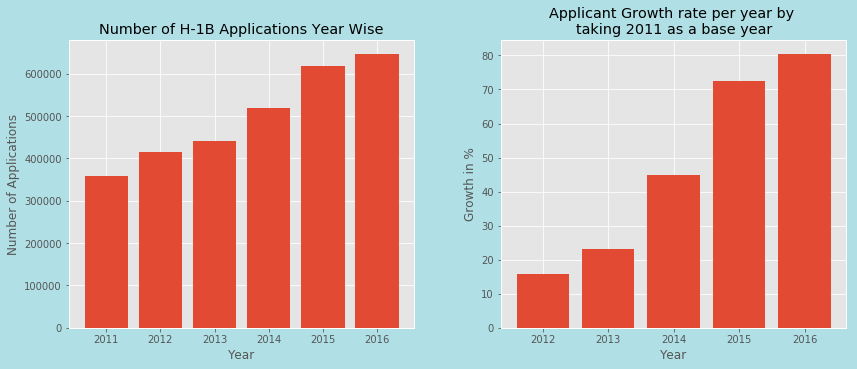

In [6]:
# Number of applications per year.

fig = plt.figure(figsize=(12,10), facecolor='#B0E0E6')
ax1 = fig.add_axes([0,0,.4,.4])
ax2 = fig.add_axes([.5,0,.4,.4])

year = df['YEAR'].value_counts()   # counting number of applicants in each year.
ax1.bar(x=year.index, height=year[:])
ax1.set_title('Number of H-1B Applications Year Wise')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Applications')

#Applications growth rate per year by taking 2011 as a base year.

q = pd.Series(data=[358767 for i in range(6)])
temp_year = year[:5]
temp_year.index = [0,1,2,3,4,5]
temp_year = ((((temp_year-q)[:5])/(q[:5]))*100)  # calculating % by taking 2011 as a base year.
temp_year.index = [2016,2015,2014,2013,2012]
ax2.bar(x=temp_year.index, height=temp_year[:])
ax2.set_title("""Applicant Growth rate per year by 
taking 2011 as a base year""")
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth in %')
plt.show()

#### The conclusion from the figures:-
* As from the figure-1 we can say that the number of applicants are increasing year over year from 2011 to 2016.
* As the number of applications are approximately double in 2016 as compare to 2011.
* It indicates that Foriegner loves to work in America as compare to previous year.
* From figure-2 one can say that the growth is tremendous after 2014 and specially in 2016 which gives us approximately 
  80% growth


##### ==========================================================================================================

### Q2). Summary of Applicants according to Case status.

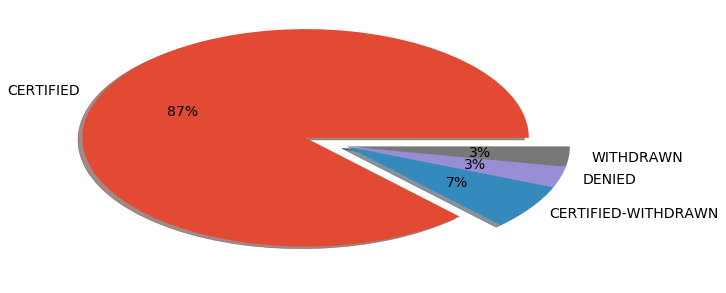

In [7]:
# Analysing the case status and Ploting the result.

status = df['CASE_STATUS'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(labels=status.index[:-3], x=status[:-3], explode=[0.2,0,0,0], autopct='%.f%%', shadow=True, textprops={'fontsize':14})
plt.show()

#### The conclusions from the Figure:-
* We can say that the one who apply for the H-1B visa, gets its visa. As 87% get it certified.
* It is easy to get H-1B certification, we can say from the data.


#### =====================================================================================================
#### =====================================================================================================

### Q3). What are the most top 10 desirable Job Titles and thier average salary?

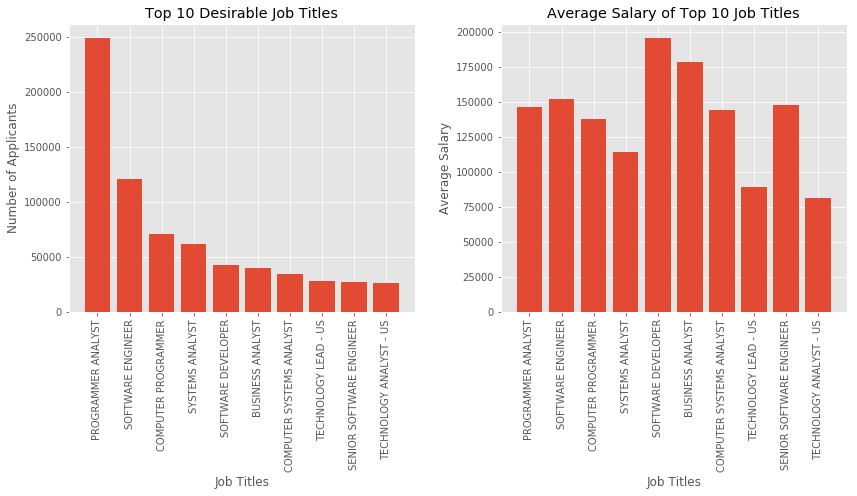

In [8]:
# Top 10 desirable job titles.

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0,0,.4,.4])
ax2 = fig.add_axes([.5,0,.4,.4])
job_title = df['JOB_TITLE'].value_counts()[:10]

ax1.bar(x=job_title.index, height=job_title[:])
ax1.set_xticklabels(labels=job_title.index , rotation=90)
ax1.set_title('Top 10 Desirable Job Titles')
ax1.set_xlabel('Job Titles')
ax1.set_ylabel('Number of Applicants')

# Average Salary of top 10 desirable Job Title.

job_title_avg = []
for i in job_title.index:
    avg = df[df['JOB_TITLE']==i]['PREVAILING_WAGE'].mean()
    job_title_avg.append(avg)
    
ax2.bar(x=job_title.index, height=job_title_avg)  
ax2.set_xticklabels(labels=job_title.index, rotation=90)
ax2.set_title('Average Salary of Top 10 Job Titles')
ax2.set_xlabel('Job Titles')
ax2.set_ylabel('Average Salary')
plt.show()

#### The conclusions from the figures:-
* Programmer analyst, software engineer, computer programmer, systems analyst they are in high demand from foreigner in America.
* As all the job titles are belongs to IT field, so IT field is in demand in America.
* But from the salary point of view Business analyst, software developer , they are getting high salary than those who are in high demnad.


#### ==================================================================================================

### Q4). Top 20 Company who sent highest H-1B visa applications.

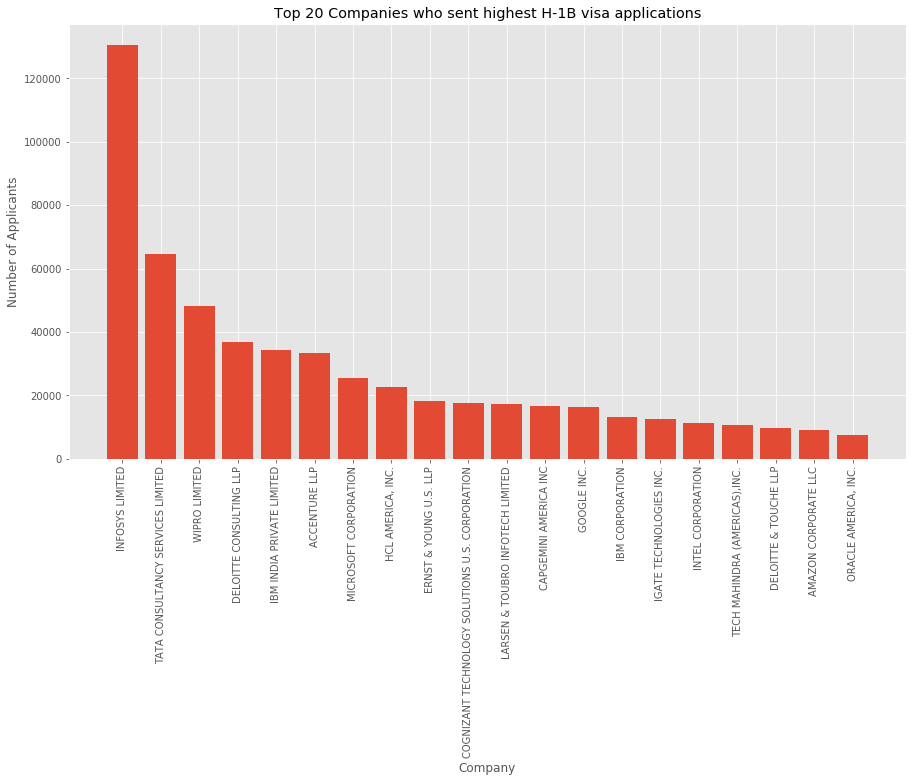

In [9]:
# Ploting companies who sent highgest H-1B visa applications

company = df['EMPLOYER_NAME'].value_counts()[:20]
plt.figure(figsize=(15,8))
plt.bar(x=company.index, height=company[:])
plt.title('Top 20 Companies who sent highest H-1B visa applications')
plt.xlabel('Company')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.show()

#### The conclusions from the figure:-
* Infosys, TCS, Wipro, Deloitte, accenture, IBM they are in high demands.

#### ====================================================================================================

### Q5). Comparision between the average salary of top 10 companies who are in demand AND top 10 companies who are paying highest salary.

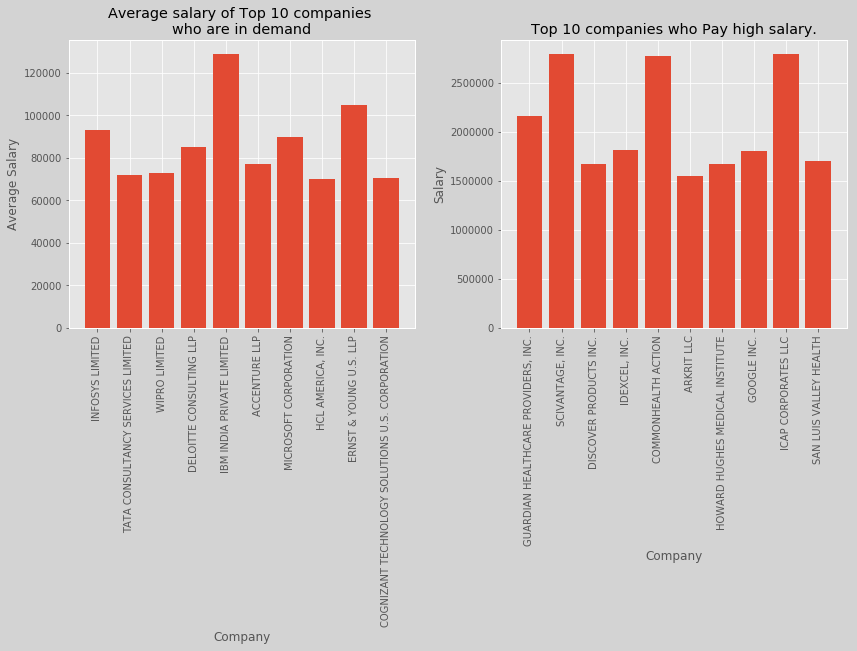

In [10]:
# Average salary of top 10 companies who are in demand.

company_demand = df['EMPLOYER_NAME'].value_counts()[:10]

company_demand_avg = []
for var in company_demand.index:
    avg = df[df['EMPLOYER_NAME']==var]['PREVAILING_WAGE'].mean()
    company_demand_avg.append(avg)
fig = plt.figure(figsize=(12,10), facecolor='#D3D3D3')
ax1 = fig.add_axes([0,0,.4,.4])

ax1.bar(x=company_demand.index, height=company_demand_avg[:])
ax1.set_xticklabels(labels=company_demand.index, rotation=90)
ax1.set_title("""Average salary of Top 10 companies 
who are in demand""")
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Salary')

# Top 10 companies who are paying highest salary

company_highsalary = df.sort_values(by='PREVAILING_WAGE', ascending=False)['EMPLOYER_NAME'][:10]

ax2 = fig.add_axes([.5,0,.4,.4])
ax2.bar(x=company_highsalary.values, height=company_highsalary.index)

ax2.set_xticklabels(labels=company_highsalary.values, rotation=90)
ax2.set_title('Top 10 companies who Pay high salary.')
ax2.set_xlabel('Company')
ax2.set_ylabel('Salary')

plt.show()

#### The conclusions from the figure:-
* The top 10 companies who are paying highest salary are totaly different from the average salary of top 10 companies who are in high demand.
* The highest salaries are double of the average salaries.
* Top 10 companies who are in demand they are hireing in bulk but they are paying less salary. On the other hand those top 10 companies who pay highest salary they hire less employees but they pay them very well and high. 

#### ====================================================================================================

### Q6). Out of all states which 10 states are more desirable  state by employees?
### Which top 5 states have denied most?
### And we have to find out, is there any correlation between these two results.

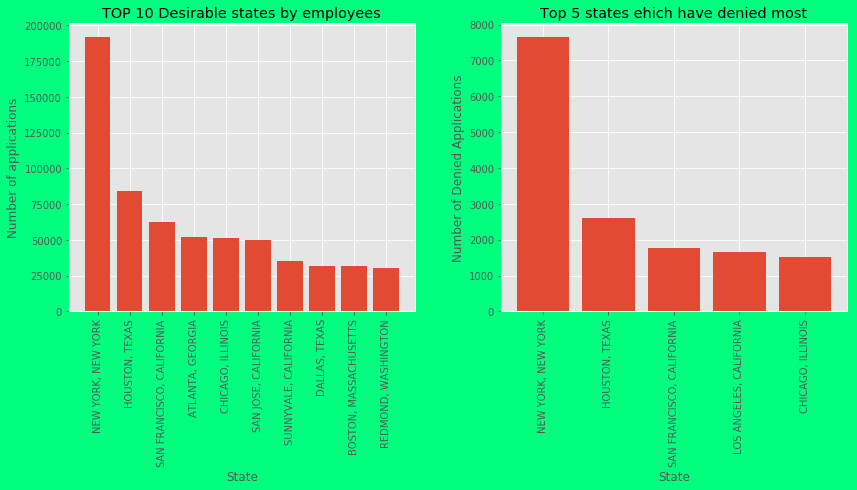


The Correlation Between these two results is-->>	 0.9984973166621055


In [11]:
# Top 10 desirable states by employees.

state = df['WORKSITE'].value_counts()[:10]

fig =plt.figure(figsize=(12,10), facecolor='#00FF7F')
ax1 = fig.add_axes([0,0,.4,.4])
ax1.bar(x=state.index, height=state.values)
ax1.set_xticklabels(labels=state.index, rotation=90)
ax1.set_title('TOP 10 Desirable states by employees')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of applications')

# Top 5 states which have denied most?

denied_states = df[df['CASE_STATUS']=='DENIED']['WORKSITE'].value_counts()[:5]

ax2 = fig.add_axes([.5,0,.4,.4])
ax2.bar(x=denied_states.index, height=denied_states.values)
ax2.set_xticklabels(labels=denied_states.index, rotation=90)
ax2.set_title('Top 5 states ehich have denied most')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Denied Applications')

plt.show()
print()
print(f'The Correlation Between these two results is-->>\t {state.corr(denied_states)}')

#### The conclusions from the figures:-
* Top 5 Desirable states by employees are also the top 5 states which have denied most.
* The states which are in demands , also denied the most.
* As wew can see the correlation between the above two results is 0.99, which indicates that they are highly correlated with each other. They are directly proportional to each other.

#### ====================================================================================================

### Q7). Ratio of Full time and Half time position.

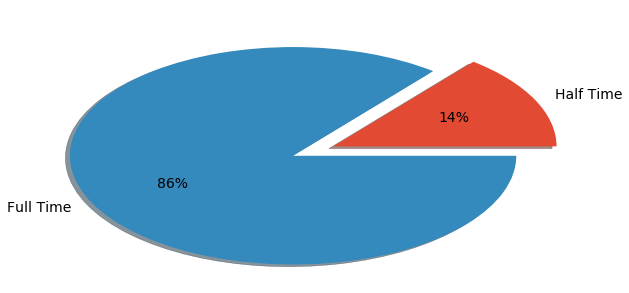

In [12]:
# Ratio of Full Time and Half Time Position.

position = df.groupby('FULL_TIME_POSITION')['CASE_STATUS']
#print(position.count())
total = position.count()[0] + position.count()[1]
#print(total)
l = ['Half Time', 'Full Time']
l1 = [(position.count()[0]/total), (position.count()[1]/total)]
plt.figure(figsize=(10,5), )
plt.pie(labels=l, x=l1, autopct='%.f%%', explode=[0,0.2], shadow=True,textprops={'fontsize':14})
plt.show()

#### The conclusions from the figure:-
* 86% employees are in Full time position and only 14% are in Half time position.
* Foreigners like to work as a full time position in America. And it is also obvious as they are in America to earn money.

#### =====================================================================================================

### Q8). How many applicants applied for Data Science job profile? Data Science job profile includes Job Titles like Data Scientist, Data Analyst, Data Engineer, Machine Learning Engineer, Business Analyst.

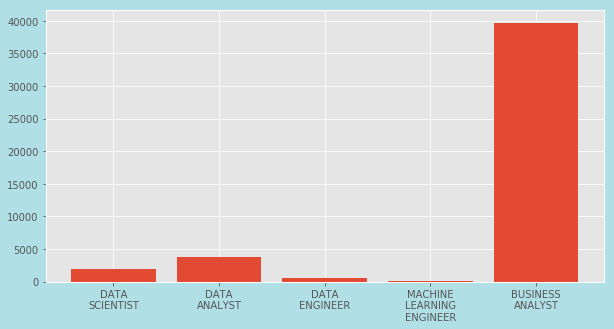


The total number of jobs related to Data Science job profile are-->>	 46056


In [13]:
# Data science job profile includes job titles like Data Scientist, Data Analyst, Data Engineer, Machine Leaning Engineer,
# Business Analyst.
# Let's check out the total job created under these job titles.

jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
count = []
# Counting the number of applicants related to each job title.
for var in jobs:
    q = df[df['JOB_TITLE']==var]['JOB_TITLE'].count()
    count.append(q)

job1 = ['DATA\nSCIENTIST', 'DATA\nANALYST', 'DATA\nENGINEER', 'MACHINE\nLEARNING\nENGINEER', 'BUSINESS\nANALYST']    
plt.figure(figsize=(10,5), facecolor='#B0E0E6')
plt.bar(x=job1, height=count)
plt.show()
print()
print(f"The total number of jobs related to Data Science job profile are-->>\t {sum(count)}")

#### The conclusions from the figure:->
* There are 46056 jobs are available for Data Science job profile.
* As many jobs related to Data sciecne job profile are there in America, so many foriegner are appling for it. 

#### ====================================================================================================

### Q9). Analysis the growth of total job titles related to data science job profile over Years.

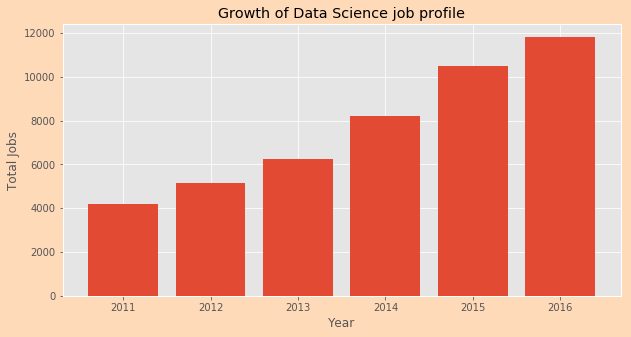

In [14]:
# Let's calculate total jobs of all job titles related to data sciene job profile over Years.

jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
total = []
# Counting number of applicants in each year for each job title.

for i in jobs:
    w = df[df['JOB_TITLE']==i].groupby('YEAR')['CASE_STATUS'].count()
    total.append(list(w.values))

total = np.array(total)

ds_total = []
# Adding all the jobs related to job profile Data Science according to year wise.

for j in range(6):
    ds_total.append(sum(total[:, j]))    
year = [2011,2012,2013,2014,2015,2016]

plt.figure(figsize=(10,5),facecolor='#FFDAB9')
plt.bar(x=year, height=ds_total)
plt.title('Growth of Data Science job profile')
plt.xlabel('Year')
plt.ylabel('Total Jobs')
plt.show()

#### The conclusions from the figure:-
* The Jobs related to Data science are increasing over the years.
* The jobs in 2016 are more then the double as compare to 2011.
* Jobs related to Data science are in demand.
* In future there is high probability that jobs related to Data science profile will increase.
* It also indicates the increase in volume of Data over years.

#### ===================================================================================================

### Q10). Analysis on the average salary of job titles related to Data Science.

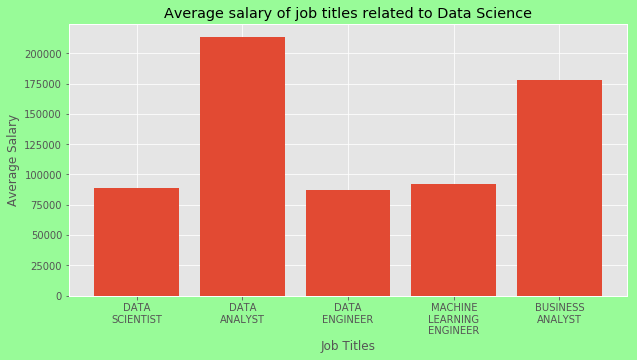

In [15]:
# Average salary of job titles related to Data Science.

jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
jobs_avg = []
for i in jobs:
    avg = df[df['JOB_TITLE']==i]['PREVAILING_WAGE'].mean()
    jobs_avg.append(avg)    

jobs1 = ['DATA\nSCIENTIST', 'DATA\nANALYST', 'DATA\nENGINEER', 'MACHINE\nLEARNING\nENGINEER', 'BUSINESS\nANALYST']
plt.figure(figsize=(10,5), facecolor='palegreen')
plt.bar(x=jobs1, height=jobs_avg)
plt.title('Average salary of job titles related to Data Science')
plt.xlabel('Job Titles')
plt.ylabel('Average Salary')
plt.show()


#### The conclusions from figure:-
* Average salary is very good and high.
* Data Analyst are getting highest among all.

#### ====================================================================================================

### Q11). Analysis of  Top 10 company where Data Analyst applied the most.

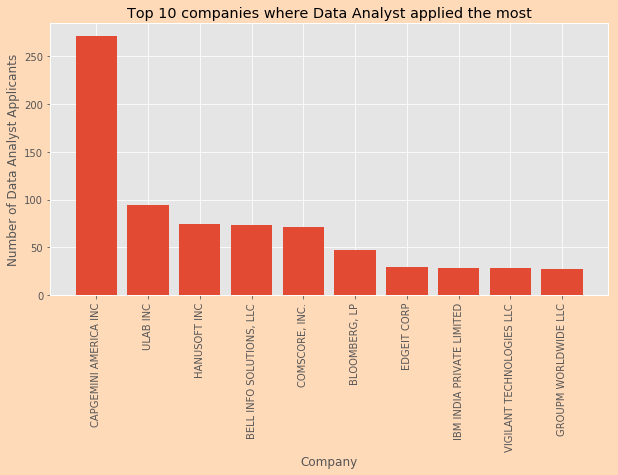

In [16]:
# Analysis of Top 10 company where Data Analyst applied the most.

company = df[df['JOB_TITLE']=='DATA ANALYST']['EMPLOYER_NAME'].value_counts()[:10]

plt.figure(figsize=(10,5), facecolor='#FFDAB9')
plt.bar(x=company.index, height=company.values)
plt.title('Top 10 companies where Data Analyst applied the most')
plt.xlabel('Company')
plt.ylabel('Number of Data Analyst Applicants')
plt.xticks(rotation=90)
plt.show()

* CAPGEMINI, ULAB , HANUSOFT they are favourite of Data Analyst.

#### =====================================================================================================

### Q12). Analysis of Top 10 Favourite Worksite of Data Analyst.

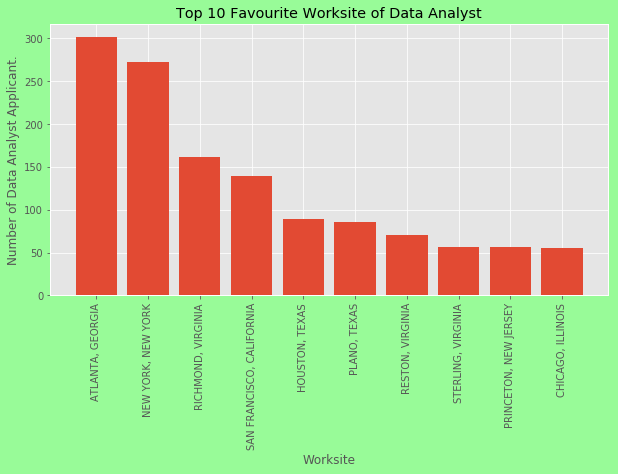

In [17]:
# Top 10 Favourite Worksite of Data Analyst.

worksite = df[df['JOB_TITLE']=='DATA ANALYST']['WORKSITE'].value_counts()[:10]

plt.figure(figsize=(10,5), facecolor='palegreen')
plt.bar(x=worksite.index, height=worksite.values)
plt.xticks(rotation=90)
plt.title('Top 10 Favourite Worksite of Data Analyst')
plt.xlabel('Worksite')
plt.ylabel('Number of Data Analyst Applicant.')
plt.show()

#### The conclusions from figure:-
* Georgia, New York, Virginia, California they are favourite of Data Analyst.
* All the 4 states are at a good distance from each other.